In [8]:
#I run this cell whenever I lode up this file
import rebound
#help(rebound)
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy
import sys

def ttor(): #two to one resonance
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun') #sets G=4pi^2 so AU, earth years, solar masses
    sim.add(m=1) #creates a star of mass 1
    sim.add(m=1e-3, x=1, vy=6.286207389817359)  #creates a planet with mass 0.001 at 1 AU
    sim.add(m=1e-3, x=-2**(2/3), vy=-4.998137607955951) #use .1 mass to show the planets having a large effect on each other
    return sim
sim2 = ttor()

def moonsetup(): #this defines a function to give a solar mass star with a planet that has a moon
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun') #sets G=4pi^2 so AU, earth years, solar masses
    sim.add(m=1) #creates a star of mass 1
    sim.add(m=1e-1, x=1, vy=6)  #creates a planet with mass 0.001 at 1 AU
    sim.add(m=1e-3, x=1.05, vy=7.8)
    return sim
sim1 = moonsetup()

def vis2(t):
    sim2.integrate(t)
    rebound.OrbitPlot(sim2,slices=0.3,color=True)
    sim2.status()
    
def vis(system, t):
    system.integrate(t)
    rebound.OrbitPlot(system,slices=0.3,color=True)
    #system.status()
    
def system13(): #two planets, at 1 and 3 AU
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun') #sets G=4pi^2 so AU, earth years, solar masses
    sim.add(m=1) #creates a star of mass 1
    sim.add(m=1e-3, a=1)  #creates a planet with mass 0.001 at 1 AU
    sim.add(m=1e-3, a=3, f=np.pi)  #creates a planet with mass 0.001 at 3 AU
                                   #f is the starting angle
    return sim

def a1po(N): #asteroids with 1 planet, the asteroid are outside of the planetary orbit
             #N is the number of test particles
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun') #sets G=4pi^2 so AU, earth years, solar masses
    sim.add(m=1)
    sim.add(m=1e-3, a=1)
    particlesAU = np.linspace(1.1, 3, N)
    for i in particlesAU:
        sim.add(a=i, f=np.random.rand()*2*np.pi)
    return sim
simast = a1po(5)

def animate(N, T, sim):
    sim.integrate(0)
    interval = T/N
    from IPython.display import display, clear_output
    import matplotlib.pyplot as plt
    sim.move_to_com()
    end_timestep = N
    print ('The timestep is ', interval, 'years.')
    #stop = input('Is this suitable? (y/n)')
    #if stop == 'n':
        #sys.exit("Enter a higher N for a lower interval.")
    for i in range(N+1):
        sim.integrate(sim.t+interval)
        fig, ax = rebound.OrbitPlot(sim,color=True,orbit_type='solid', unitlabel="[AU]",xlim=[-5,5],ylim=[-5,5])
        display(fig)
        print (i, "timesteps,", i*interval, "years")
        print("The interval is", interval, 'years.')
        """if i == end_timestep/2:
            print("The current timestep is", i, ". This is a time of", i*interval,"years.")
            tf = input("Would you like to continue? (y/n)")
            if tf == 'n':
                break""" #I use these lines if I'm worried the total time is too high
        plt.close(fig)
        clear_output(wait=True)
        
def quickplot(sim): #this uses matplotlib to plot the orbit, instead of rebound
    coords = np.zeros((2,sim.N))
    for i in range(sim.N):
        coords[0][i], coords[1][i] = sim.particles[i].x, sim.particles[i].y
    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.scatter(coords[0],coords[1])
    ax.scatter(sim.particles[1].x,sim.particles[1].y); # Planet

In [3]:
def backup(sim): #converts a simulation into an array to store the information
    backupinfo = np.zeros((sim.N,7))
    for i in range(sim.N):
        sp = sim.particles
        backupinfo[i,0] = sp[i].m
        backupinfo[i,1] = sp[i].x
        backupinfo[i,2] = sp[i].y
        backupinfo[i,3] = sp[i].z
        backupinfo[i,4] = sp[i].vx
        backupinfo[i,5] = sp[i].vy
        backupinfo[i,6] = sp[i].vz
    return backupinfo #then copy and paste into the next cell, 
                      #so restarting the kernel doesn't lose it

In [4]:
astbackupinfo = np.array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.00000000e-03,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  6.28620739e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  6.28578954e-01, -9.03406554e-01,
         0.00000000e+00,  4.92246814e+00,  3.42582820e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.41744797e+00, -6.88692480e-01,
         0.00000000e+00,  2.19024758e+00,  4.51101027e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  9.39517273e-01, -1.82254861e+00,
         0.00000000e+00,  3.90334587e+00,  2.01630116e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  2.06023678e+00, -1.46122030e+00,
         0.00000000e+00,  2.28935071e+00,  3.23256790e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.28665819e+00, -2.71054984e+00,
         0.00000000e+00,  3.27917218e+00,  1.56164622e+00,
         0.00000000e+00]])

In [5]:
def backupcopy(bp): #this coverts the array copy into a simulation.
                    #this is the 'inverse' of backup(). 
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun') #sets G=4pi^2 so AU, earth years, solar masses
    for i in range(len(bp)):
        sim.add(m=bp[i,0], x=bp[i,1], y=bp[i,2], z=bp[i,3], vx=bp[i,4], \
                vy=bp[i,5], vz=bp[i,6])
    return sim

In [23]:
testlist = [['inner planet mass', 'outer planet mass', 'seed'], [0.002190000000000003, 0.0022800000000000034, 0], [0.002190000000000003, 0.002470000000000004, 1], [0.0023200000000000035, 0.0022900000000000034, 2], [0.0024100000000000037, 0.002590000000000004, 3], [0.0022900000000000034, 0.002540000000000004, 4], [0.002440000000000004, 0.002490000000000004, 5], [0.0023800000000000036, 0.002190000000000003, 6], [0.0022400000000000033, 0.0024000000000000037, 7], [0.002450000000000004, 0.002470000000000004, 8], [0.0023900000000000037, 0.002550000000000004, 9]]
def masslist_txt(lst,sim = None):
    def avg(listt):
        sum = 0
        for i in listt:
            sum += i
        return sum / len(listt)
    message = ''
    
    for i in lst[3:]:
        i.insert(place,new)
        for j in i:
            message += str(j)
            message +='\t'
        message +='\n'
    message +='\n'
    with open('planetmasses1.txt','a') as file:
        file.write(sim+'\n')
        file.write("Inner planet mass\tOuter planet mass\tPercent Difference\tSeed\n")
        file.write(message)
masslist_txt(testlist,'ttor')

In [1]:
testlist = [['inner planet mass', 'outer planet mass', 'seed'], [0.002190000000000003, 0.0022800000000000034, 0], [0.002190000000000003, 0.002470000000000004, 1], [0.0023200000000000035, 0.0022900000000000034, 2], [0.0024100000000000037, 0.002590000000000004, 3], [0.0022900000000000034, 0.002540000000000004, 4], [0.002440000000000004, 0.002490000000000004, 5], [0.0023800000000000036, 0.002190000000000003, 6], [0.0022400000000000033, 0.0024000000000000037, 7], [0.002450000000000004, 0.002470000000000004, 8], [0.0023900000000000037, 0.002550000000000004, 9]]
def masslist_txt(masslist,sim = None,write_type = 'a'):
    """
    Saves the masslists into a formatted txt file.
    """
    
    def avg(listt):
        sum = 0
        for i in listt:
            sum += i
        return sum / len(listt)

    masslistcopy = masslist.copy() # Don't want to edit the original data
    percentlist = list()
    message = ''
    message+="Inner planet mass\tOuter planet mass\tPercent Difference\tSeed\n"
    for data in masslistcopy[1:]:
        percentdif = abs((data[0]-data[1])/data[0])*100
        roundedpercentdif = round(percentdif,2)
        percentlist.append(percentdif)
        data.insert(2,percentdif)
        for j in data:
            message += str(j)
            message +='\t'
        message +='\n'   
    message+= "\nAverage percent difference= {}.\n\n".format(avg(percentlist))
    with open('planetmasses2.txt',write_type) as file:
        file.write(sim+'\n')
        file.write(message)
masslist_txt(testlist,'ttor','w')

In [5]:
def masslist_read(filePath):
    """
    Inverse of masslist_txt()
    """
    with open(filePath,'r') as datafile:
        contents = datafile.read()
    contents = contents.split()
    finalList = []
    for index,value in enumerate(contents):
        try:
            value = float(value)
            finalList.append(value)
            ####contents[index] = value
        except:
            pass
    ####for i in range(0,int(len(contents)), 4):
        ####finalList.append([contents[i:i+4]])
    return finalList
#masslist_read('test.txt')
print(masslist_read("test.txt"))

def avg(listt):
    sum = 0
    for i in listt:
        sum += i
    return sum / len(listt)
def averagePercent(filePath):
    dataList = masslist_read(filePath)
    percentList = []
    for i in range(2,len(dataList),4):
        percentList.append(dataList[i])
    return avg(percentList)
print(averagePercent("test.txt"))

[0.002190000000000003, 0.0022800000000000034, 4.109589041095895, 0.0, 0.002190000000000003, 0.002470000000000004, 12.785388127853897, 1.0, 0.0023200000000000035, 0.0022900000000000034, 1.2931034482758634, 2.0]


In [ ]:
def avg(listt):
    sum = 0
    for i in listt:
        sum += i
    return sum / len(listt)
def listmasses(masslist):
    percentlist = list()
    print( 'inner planet mass |', 'outer planet mass |', 'percent difference |', 'seed')
    for data in masslist:
        if type(data[0]) == str:
            continue
        percentdif = abs((data[0]-data[1])/data[0])*100
        roundedpercentdif = round(percentdif,2)
        percentlist.append(percentdif)
        print(round(1e5*data[0]),'              |',round(1e5*data[1]),\
              '              |', roundedpercentdif,'              |' ,data[2])
    print("\nAverage percent difference = {}.".format(avg(percentlist)))

print("One planet mass is 1e-3 the mass of the Sun. The planets started at 100 asteroid masses.\nThe asteroids had a mass of 1e-5.\n")
print("ttor:")
listmasses(ttor_masses)
print("\ntttr:")
listmasses(tttr_masses)
print("\nnor:")
listmasses(nor_masses)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
Helpful stuff for graphing

In [7]:
print("hi")

hi


In [4]:
#test on linux

In [33]:
testlist = [['inner planet mass', 'outer planet mass', 'seed'], [0.002190000000000003, 0.0022800000000000034, 0], [0.002190000000000003, 0.002470000000000004, 1], [0.0023200000000000035, 0.0022900000000000034, 2], [0.0024100000000000037, 0.002590000000000004, 3], [0.0022900000000000034, 0.002540000000000004, 4], [0.002440000000000004, 0.002490000000000004, 5], [0.0023800000000000036, 0.002190000000000003, 6], [0.0022400000000000033, 0.0024000000000000037, 7], [0.002450000000000004, 0.002470000000000004, 8], [0.0023900000000000037, 0.002550000000000004, 9]]
testlist1 = [['inner planet mass', 'outer planet mass', 'seed'], [0.002190000000000003, 0.0022800000000000034, 0]]
testlist2 = [['inner planet mass', 'outer planet mass', 'seed'],[0.002190000000000003, 0.002470000000000004, 1]]
testlist3 = [['inner planet mass', 'outer planet mass', 'seed'],[0.0023200000000000035, 0.0022900000000000034, 2]]
print(testlist)
def masslist_txt_append(masslist,sim = None,write_type = 'a', **kwargs):
    """
    Saves the masslists into a formatted txt file. This is similar to masslist_txt except 
    it lends itself better to appending.
    """
    
    def avg(listt):
        sum = 0
        for i in listt:
            sum += i
        return sum / len(listt)
    
    masslistcopy = masslist.copy() # Don't want to edit the original data
    global percentlist
    message = ''
    if kwargs.get('first'): 
        percentlist = list()
        message += sim+'\n'
        message+="Inner planet mass\tOuter planet mass\tPercent Difference\tSeed\n"
    for data in masslistcopy[1:]:
        #data = data.copy() #comment out this line to not have the original list change
        percentdif = abs((data[0]-data[1])/data[0])*100
        roundedpercentdif = round(percentdif,2)
        percentlist.append(percentdif)
        data.insert(2,percentdif)
        for j in data:
            message += str(j)
            message +='\t'
        message +='\n'   
    if kwargs.get('last'):
        message+= "\nAverage percent difference= {}.\n\n".format(avg(percentlist))
    with open('test.txt',write_type) as file:
        file.write(message)
masslist_txt_append(testlist1,'ttor','w', first = True)
masslist_txt_append(testlist2,'ttor','a')
masslist_txt_append(testlist3,'ttor','a', last = True)

[['inner planet mass', 'outer planet mass', 'seed'], [0.002190000000000003, 0.0022800000000000034, 0], [0.002190000000000003, 0.002470000000000004, 1], [0.0023200000000000035, 0.0022900000000000034, 2], [0.0024100000000000037, 0.002590000000000004, 3], [0.0022900000000000034, 0.002540000000000004, 4], [0.002440000000000004, 0.002490000000000004, 5], [0.0023800000000000036, 0.002190000000000003, 6], [0.0022400000000000033, 0.0024000000000000037, 7], [0.002450000000000004, 0.002470000000000004, 8], [0.0023900000000000037, 0.002550000000000004, 9]]


In [14]:
import numpy as np
np.linspace(0,100,2)

array([  0., 100.])

103
| 0.0 time = 0.0 years | 103 particles | 0 step number |
| 0.0 second | 0.0 minutes.

| 3.490658503988659 time = 0.5555555555555556 years | 103 particles | 1 step number |
| 0.0 second | 0.0 minutes.

| 6.981317007977318 time = 1.1111111111111112 years | 103 particles | 2 step number |
| 0.1 second | 0.0 minutes.

| 10.471975511965978 time = 1.6666666666666667 years | 103 particles | 3 step number |
| 0.2 second | 0.0 minutes.

| 13.962634015954636 time = 2.2222222222222223 years | 103 particles | 4 step number |
| 0.2 second | 0.0 minutes.

| 17.453292519943297 time = 2.777777777777778 years | 103 particles | 5 step number |
| 0.2 second | 0.0 minutes.

| 20.943951023931955 time = 3.3333333333333335 years | 103 particles | 6 step number |
| 0.3 second | 0.0 minutes.

| 24.434609527920614 time = 3.888888888888889 years | 103 particles | 7 step number |
| 0.3 second | 0.0 minutes.

| 27.925268031909273 time = 4.444444444444445 years | 103 particles | 8 step number |
| 0.4 second | 0

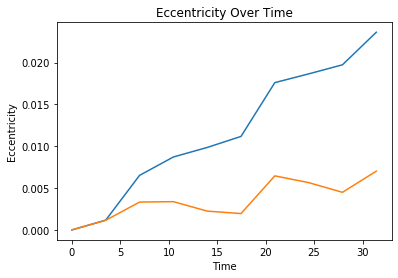

In [11]:
from functions import *
tau = 2*np.pi
sim = generatettor(simulation = ttor,seed = 0, asteroidnumber = 100)
quickcollect2(n=2, Ti=0, Tf=5*tau, stepnumber=10, sim = sim)
plt.clf()
plt.plot(times, eccs)
plt.title('Eccentricity Over Time')
plt.xlabel('Time')
plt.ylabel('Eccentricity')
plt.savefig("testthing.jpg")